## Steps til at køre scriptet:
1. Tag en kopi af denne notebook INDEN ændringer laves
2. Skriv dit navn (martin/pratt/charlotte) i en string med små bogstaver i variablen nedenfor

In [80]:
#eksempel:
name = None #skal enten være: martin/pratt/charlotte
run = "run2_"

In [81]:
from __future__ import print_function
#%matplotlib inline
import argparse
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import pandas as pd
import data_utils.data_utils_celeba_pytorch5 as data_utils
import data_utils.network_tuning_valid6 as network_tuning
from IPython.display import clear_output
from skimage.io import imread
from skimage.transform import resize
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import pandas as pd
import pickle
# Load functions
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.optim as optim
from torch.nn import Linear, GRU, Conv2d, Dropout2d, MaxPool2d, BatchNorm2d
from torch.nn.functional import relu, elu, relu6, sigmoid, softmax

In [82]:
IMAGE_SHAPE = [73,60,3]
# Paths to data
# Root directory for dataset
if name=="charlotte":
    dataroot = '..\\AlgorithmicFairness'
    TRAIN_PATH =  dataroot + "\\Data\\train.csv" 
    VALID_PATH = dataroot + "\\Data\\valid.csv" 
    TEST_PATH = dataroot + "\\Data\\test.csv" 
    IMAGE_PATHS = "C:\\Users\\cfthe\\OneDrive\\DTU\\Kandidat\\Deep\\celebA_resize3\\"

else:
    dataroot = '../AlgorithmicFairness'
    TRAIN_PATH =  dataroot + "/Data/train.csv" 
    VALID_PATH = dataroot + "/Data/valid.csv" 
    TEST_PATH = dataroot + "/Data/test.csv" 
    IMAGE_PATHS = ??
TARGET_COL = 'Smiling'
NUM_CLASSES = 2

# train holds both X (input) and t (target/truth)
data_train = data_utils.CelebADataset(TRAIN_PATH,IMAGE_PATHS,IMAGE_SHAPE,TARGET_COL)
data_valid = data_utils.CelebADataset(VALID_PATH,IMAGE_PATHS,IMAGE_SHAPE,TARGET_COL)

#tuning the network round 1
df = pd.DataFrame(index=list(range(1,9)), columns=['layers','activations','conv_out_channels','kernel_size','conv_stride','maxpool'\
                                                    ,'dropout','batchnorm','optimizer','learning_rate','weight_decay','batch_size','num_epochs'\
                                                    ,'net','train_loss','train_accs','valid_train_loss','valid_train_accs','valid_loss','valid_accs'])

df['layers'] = 2

#adjust activation function
for i in range(1,9):
    df.at[i,'activations'] = [relu, relu, relu, relu]

df.at[1,'activations'] = [relu, torch.tanh]
df.at[5,'activations'] = [relu, relu, torch.tanh]
df.at[6,'activations'] = [relu, relu, relu, torch.tanh]


df['conv_out_channels'] = 32
df['kernel_size'] = 5
df['conv_stride'] = 1
df['maxpool'] = 2
df['dropout'] = 0.2
df['batchnorm'] = True
df['optimizer']='Adam'
df['learning_rate']=0.001
df['weight_decay']=0.01
df['batch_size']=128
df['num_epochs']=5

#adjust depth
df.at[5,'layers'] = 3
df.at[6,'layers'] = 4
df.at[7,'layers'] = 3
df.at[8,'layers'] = 4

#adjust channels
df.at[3,'conv_out_channels'] = 64
df.at[6,'conv_out_channels'] = 16
df.at[8,'conv_out_channels'] = 16

#adjust dropout and weigth decay
df.at[3,'dropout'] = 0.8
df.at[3,'weight_decay']=0.1


NameError: name 'img_path' is not defined

In [77]:
df

,layers,activations,conv_out_channels,kernel_size,conv_stride,maxpool,dropout,batchnorm,optimizer,learning_rate,weight_decay,batch_size,num_epochs,net,train_loss,train_accs,valid_train_loss,valid_train_accs,valid_loss,valid_accs
1,2,"[<function relu at 0x000001250B4B2E18>, <built...",32,5,1,2,0.2,True,Adam,0.001,0.01,128,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,"[<function relu at 0x000001250B4B2E18>, <funct...",32,5,1,2,0.2,True,Adam,0.001,0.01,128,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,"[<function relu at 0x000001250B4B2E18>, <funct...",64,5,1,2,0.8,True,Adam,0.001,0.10,128,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,"[<function relu at 0x000001250B4B2E18>, <funct...",32,5,1,2,0.2,True,Adam,0.001,0.01,128,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3,"[<function relu at 0x000001250B4B2E18>, <funct...",32,5,1,2,0.2,True,Adam,0.001,0.01,128,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4,"[<function relu at 0x000001250B4B2E18>, <funct...",16,5,1,2,0.2,True,Adam,0.001,0.01,128,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3,"[<function relu at 0x000001250B4B2E18>, <funct...",32,5,1,2,0.2,True,Adam,0.001,0.01,128,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,4,"[<function relu at 0x000001250B4B2E18>, <funct...",16,5,1,2,0.2,True,Adam,0.001,0.01,128,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
for i in list(df.index):#range(len(df)):
    print('Model: ', i)
    layers = df.loc[i,'layers']
    activations = df.loc[i,'activations']
    conv_out_channels = df.loc[i,'conv_out_channels']
    kernel_size = df.loc[i,'kernel_size']
    conv_stride = df.loc[i,'conv_stride']
    maxpool = int(df.loc[i,'maxpool'])
    dropout = df.loc[i,'dropout']
    batchnorm = df.loc[i,'batchnorm']
    optimizer = df.loc[i,'optimizer']
    learning_rate = df.loc[i,'learning_rate']
    weight_decay = df.loc[i,'weight_decay']
    batch_size = int(df.loc[i,'batch_size'])
    num_epochs = df.loc[i,'num_epochs']
    
    net = network_tuning.tune_architecture(layers, activations, IMAGE_SHAPE, conv_out_channels, kernel_size,conv_stride, maxpool, dropout, batchnorm)
    net_trained, df.at[i,'train_loss'], df.at[i,'train_accs'], df.at[i,'valid_train_loss'], df.at[i,'valid_train_accs'] = network_tuning.tune_train(net, data_train, data_valid, optimizer, learning_rate, weight_decay, batch_size, num_epochs)
    df.at[i,'valid_loss'], df.at[i,'valid_accs'] = network_tuning.tune_valid(net, data_valid, batch_size)
    df.at[i,'net'] = run+'_model'+str(i)
    df.to_pickle(run+'_df.pkl')
    torch.save(net_trained.state_dict(), run+'_model'+str(i))

Model:  1
No GPU available.
Epoch:  0


KeyboardInterrupt: 

In [ ]:
#plt.plot(pd.Series(df.loc[4,'train_accs']).rolling(window=600).mean())

In [ ]:
#pd.Series(df.loc[1,'train_accs']).rolling(window=600).mean()

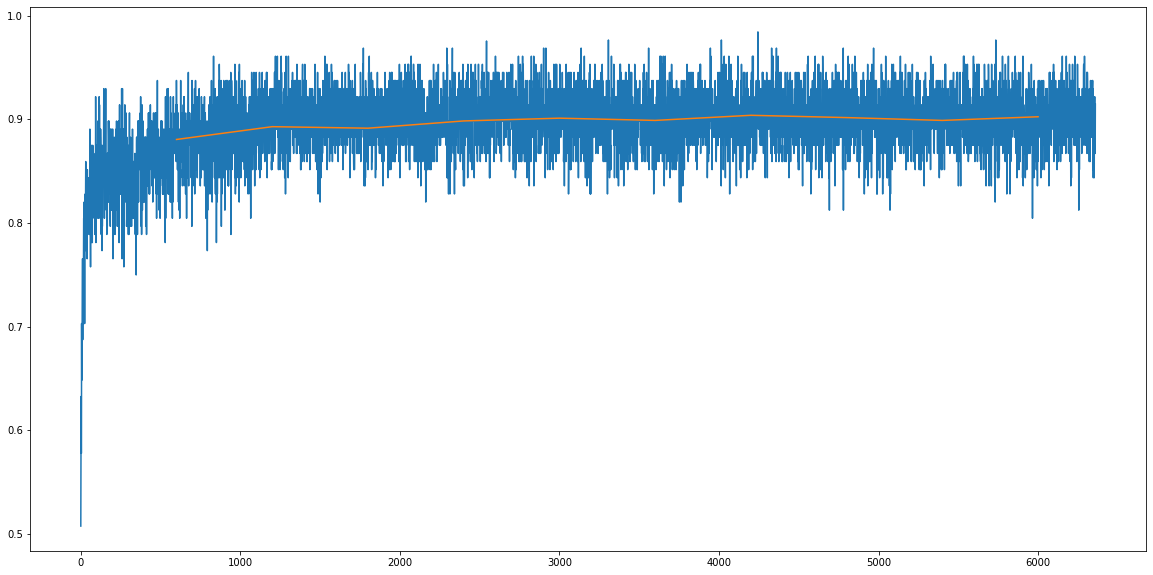

In [20]:
plt.figure(figsize=(20,10))
plt.plot(df.loc[1,'train_accs'])
plt.plot([600,1200,1800,2400,3000,3600,4200,4800,5400,6000],df.loc[1,'valid_train_accs'])


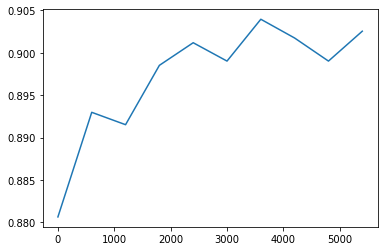

In [18]:
plt.plot([0,600,1200,1800,2400,3000,3600,4200,4800,5400],df.loc[1,'valid_train_accs'])